## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    1. Which variables are significant in predicting the demand for shared bikes?
    2. How well those variables describe the bike demands
    
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

## Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1 : Data Load & Understanding

In this section, I will:

- Import the basic Python libraries.
- Load the `day.csv` file.
- Do a quick structural check of the dataset (rows, columns, data types, etc.).

In [100]:
# import necessary libraries
# basic libraries
import pandas as pd
import numpy as np

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# stats/modelling
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# sklearn tools
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [101]:
# for plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [102]:
# reading the data
df = pd.read_csv("/Users/maneeshisingh/Desktop/Upgrad/Linear Regression/day.csv")

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [103]:
# checking row and column count
df.shape

(730, 16)

In [104]:
# checking basic info about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There appears to be no null values present in the data

In [105]:
# checking summary statistics for numeric columns
df.describe().T


,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.995890,2.000339,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.690411,0.462641,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


Some of the observations i noticed based on the above summary statistics :
1. No missing values
    * Every column has a count of 730, so looks like the dataset is complete. Nothing seems to be missing.
2. Holiday & Workingday
    * both are clearly binary variables
    * holiday has a mean of 0.028, which basically tells me almost all the days are non-holidays.
    * workingday has a mean around 0.69, so roughly 70% of the days are working days.
3. Temperature & Feels-like Temperature
    * temp has an average of around 20.3, and atemp around 23.7, which seems to indicate the weather is mostly moderate.
    * Both also have reasonable ranges — no weird extremes in min or max.
4. Humidity & Windspeed
    * Humidity has a mean of 62%, so the climate seems slightly humid overall.
    * Windspeed averages around 12, which looks like mild wind for most days.
6. User Counts (casual, registered, total)
    * Casual users average ~849, whereas registered users average ~3658, so registered riders dominate the usage.
    * The total count (cnt) has a pretty wide range — from 22 to 8714.
    * The median (50%) is around 4548, so half of the days fall roughly below or above that.
7. Instant (index)
    * The instant column just goes from 1 to 730, so it’s basically just a sequential ID.

## Step 2 : Data Cleaning

Here I will:

- Check for missing values.
- Look for duplicate rows.
- Convert the date column into a proper datetime type.
- Convert coded categorical variables - numeric category codes to string categories.
- Check data types
- Make a note of columns that are clearly IDs or not useful for prediction.

In [106]:
# checking for missing values
df.isna().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no missing values in the data

In [107]:
# checking for duplicates
df.duplicated().sum()


0

There are no duplicate rows in the dataset

In [108]:
# converting date to datetime for understanding
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')

df[['instant', 'dteday']].head()


,instant,dteday
0,1,2018-01-01
1,2,2018-01-02
2,3,2018-01-03
3,4,2018-01-04
4,5,2018-01-05


In [109]:
# Mapping season 
df.season = df.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

In [110]:
# Mapping month
df.mnth = df.mnth.map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})

In [111]:
# Mapping weekday
df.weekday = df.weekday.map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})

In [112]:
# Mapping weathersit
df.weathersit = df.weathersit.map({1:'Clear',2:'Cloudy',3:'Light Snow or Rain',4:'Heavy Snow or Rain'})

In [113]:
# Mapping yr
df.yr = df.yr.map({0:'2018',1:'2019'})

In [114]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,Spring,2018,January,0,Monday,1,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,Spring,2018,January,0,Tuesday,1,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,Spring,2018,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,Spring,2018,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,Spring,2018,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [115]:
# checking data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

## Step 4 : Univariate Analysis (EDA)

In this part, I am exploring each variable on its own to understand:

- The distribution of numerical variables (e.g., `cnt`, `temp`, `hum`, `windspeed`).
- The frequency of categories for categorical variables (e.g., `season`, `mnth`, `weekday`, `weathersit`, `yr`, `holiday`, `workingday`).

This helps in spotting outliers, skewness, and basic patterns.

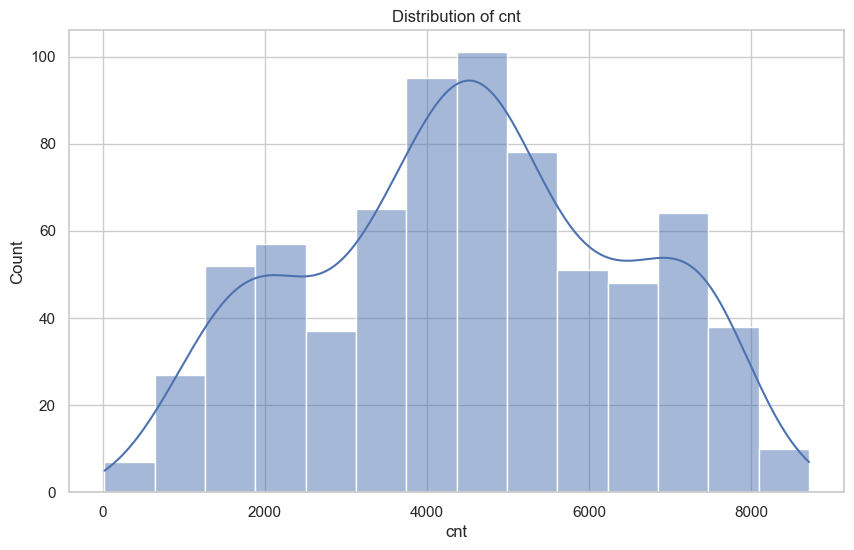

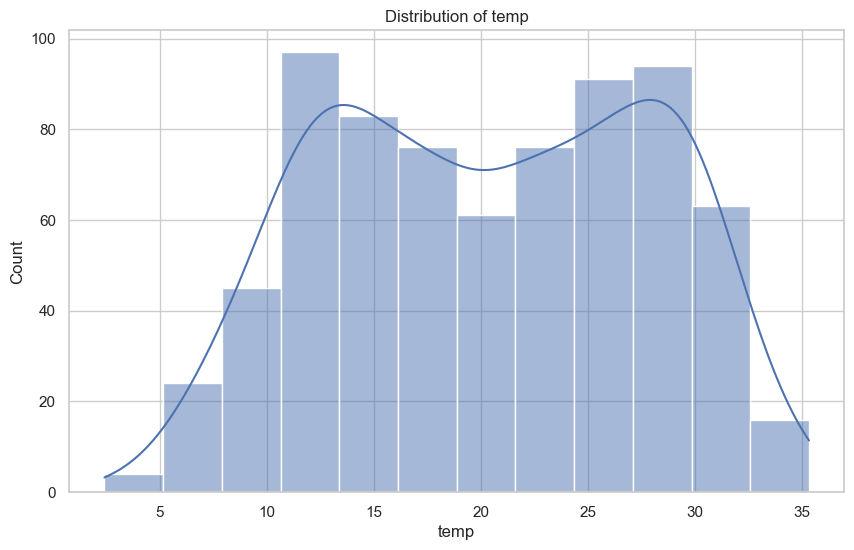

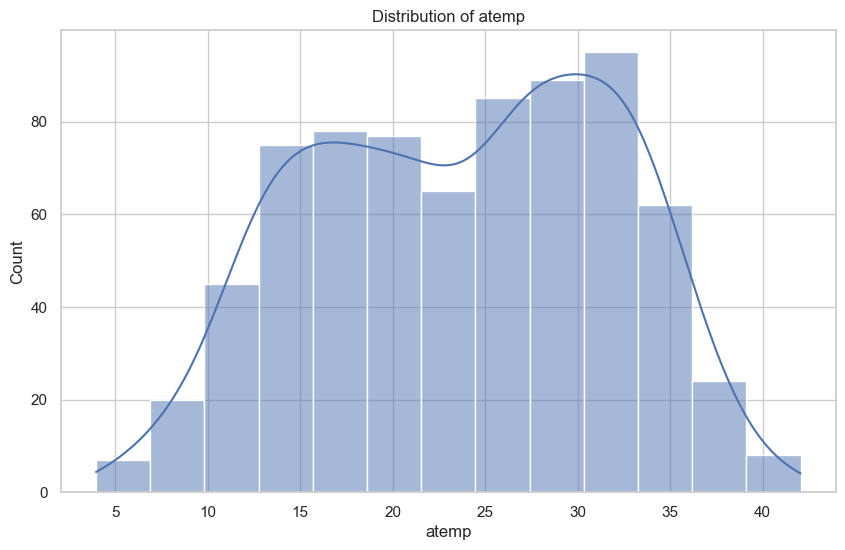

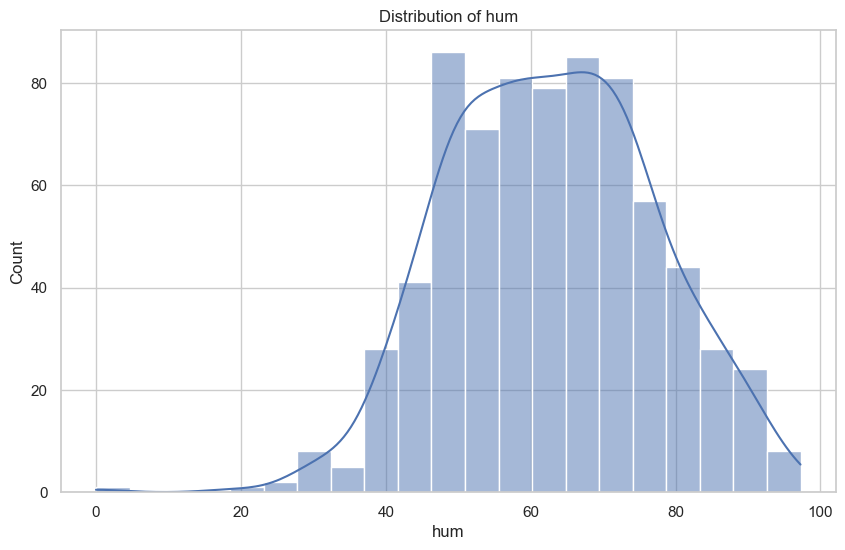

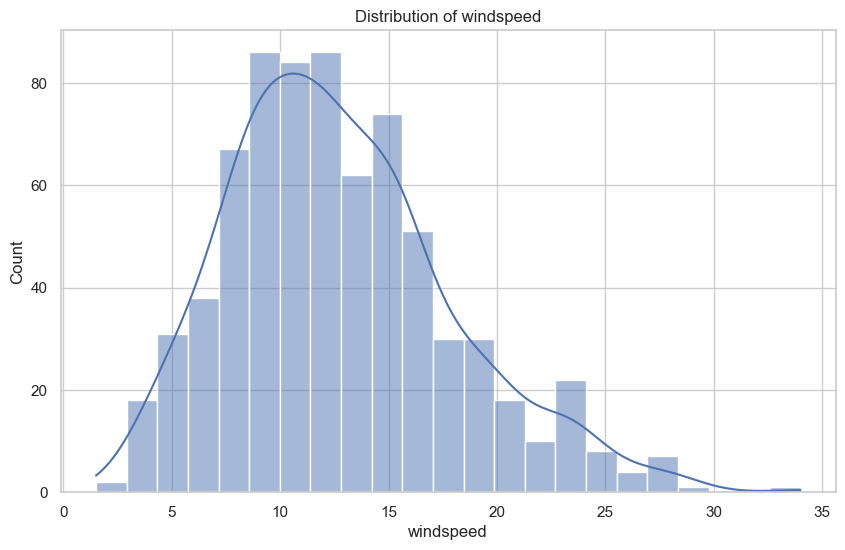

In [116]:
# for numneric variables
num_cols = ['cnt', 'temp', 'atemp', 'hum', 'windspeed']

for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


Some of the observations i noticed :
1. Total Rentals (cnt)
    * Most days fall somewhere between ~3000 to 6000 rides.
    * Very low or very high rental days are less common, so overall demand seems pretty steady.
2. Temperature (temp)
    * Temperatures mostly sit in a normal, moderate range.
    * There are no extreme cold or extreme hot values in the dataset.
3. Feels-like Temperature (atemp)
    * Most values cluster between what feels like 10°C to 30°C.
    * Only a handful of days fall outside that range.
4. Humidity (hum)
    * Humidity is slightly right-skewed — a lot of days fall in the higher humidity zone.
    * Most days sit between 50% and 80%.
    * Really dry days (below 30%) barely appear.
5. Windspeed
    * Windspeed also shows a right-skew.
    * Most days have gentle wind, around 5–15 units.
    * High windspeed days above 20 are pretty rare.


Overall Pattern : Nothing looks too unusual — no extreme outliers or sudden spikes. The dataset seems fairly clean.


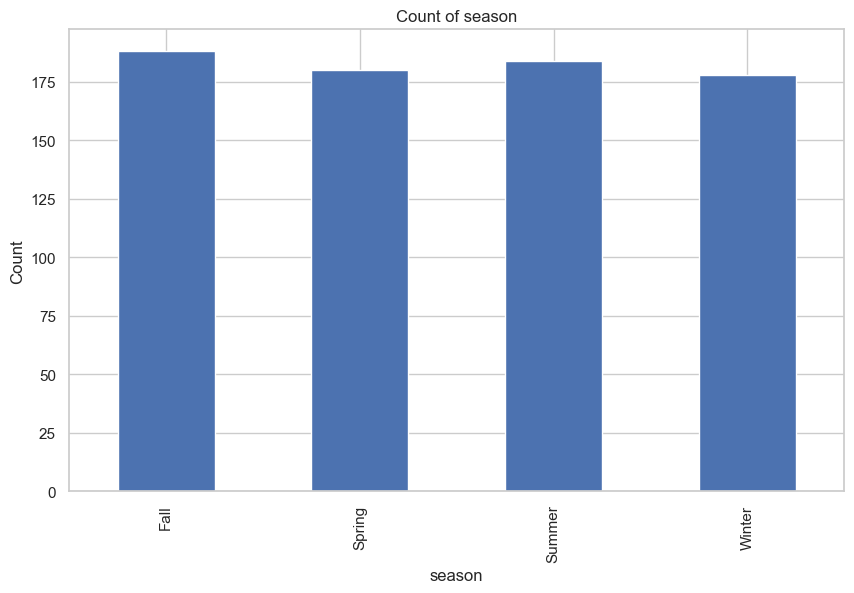

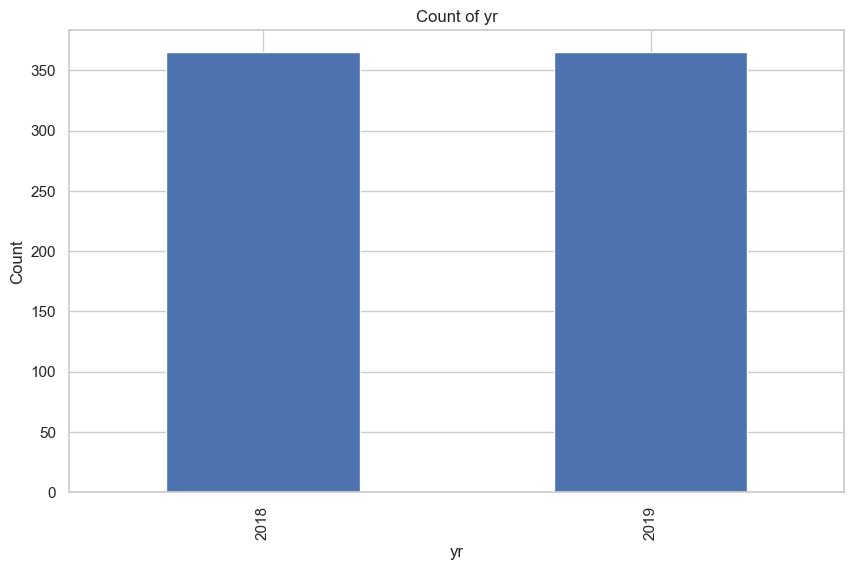

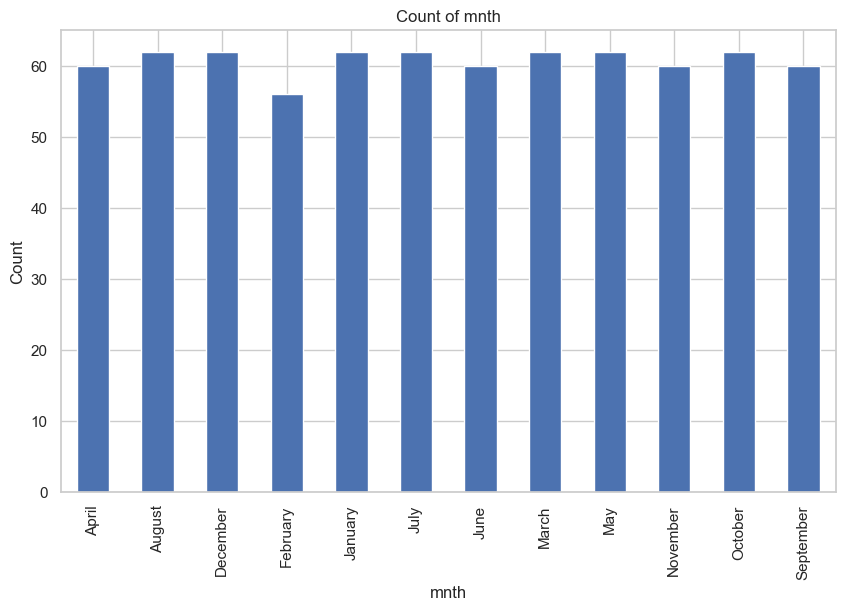

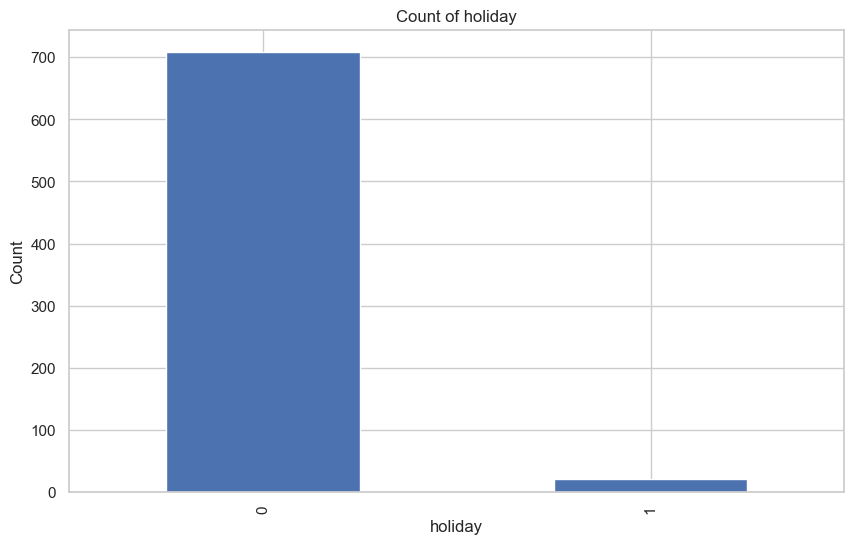

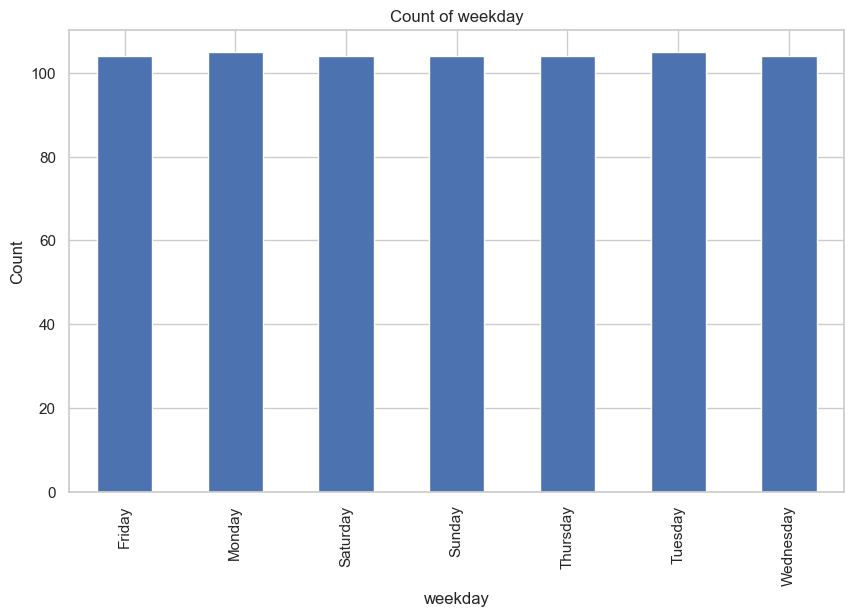

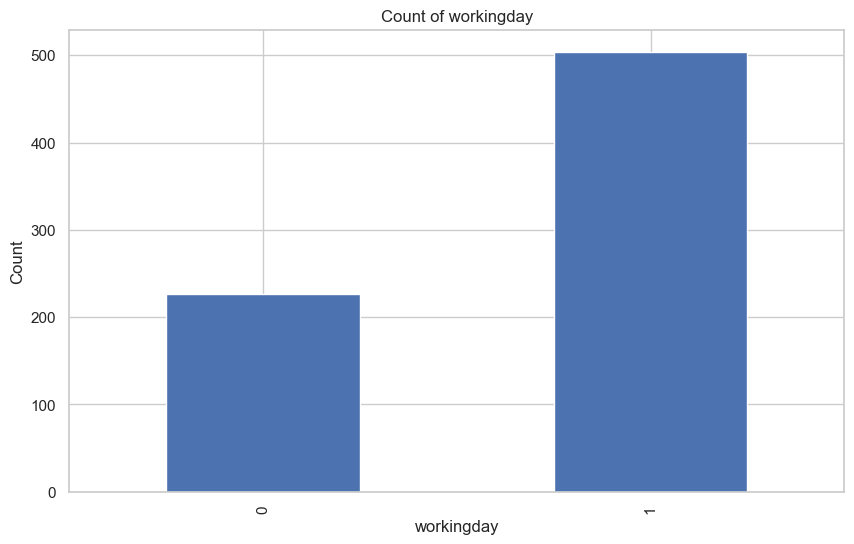

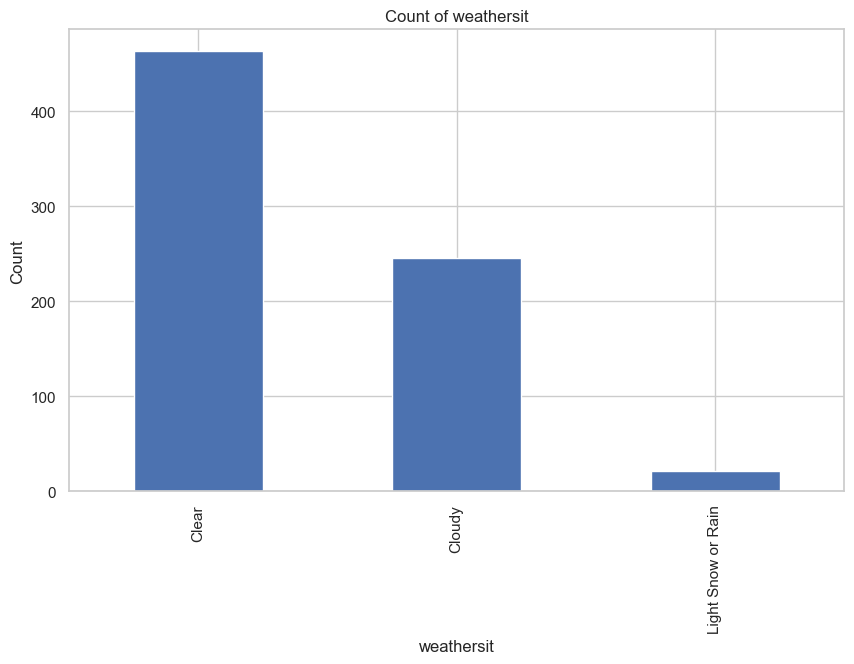

In [117]:
# for categorical variables
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for col in cat_cols:
    plt.figure()
    df[col].value_counts().sort_index().plot(kind='bar')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


Some of the Observations i noticed :
1. Season
    * The data is pretty evenly spread across all four seasons. No season seems over-used or missing.
2. Year
    * Both 2018 and 2019 have almost the same number of records, so the dataset covers both years evenly.
3. Month
    * Each month has around the same number of entries.
    * Nothing looks unusual — no month has too many or too few records, so the data seems to have been logged consistently.
4. Holiday
    * There are very few holidays compared to normal days, which makes sense since holidays are limited.
    * Because of this imbalance, the “holiday” feature might matter for the model but only for a small set of rows.
5. Weekday
    * All seven days occur in almost equal frequency.
    * This suggests data collection was continuous — no specific weekdays were skipped.
6. Workingday
    * Non-working days are fewer, which is expected. Most days are working days.
7. Weather Situation
    * Most days fall under “Clear” weather.
    * Cloudy days come next.
    * Days with light snow or rain are very few, and there are no extreme-weather days recorded.

## Step 5 : Bivariate Analysis (EDA)

Here I will look at how the bike demand (`cnt`) changes with:

- Continuous variables: `temp`, `atemp`, `hum`, `windspeed`
- Categorical variables: `season`, `mnth`, `weekday`, `weathersit`, `yr`, `holiday`, `workingday`

This will give an idea or indication of which variables might be important predictors.


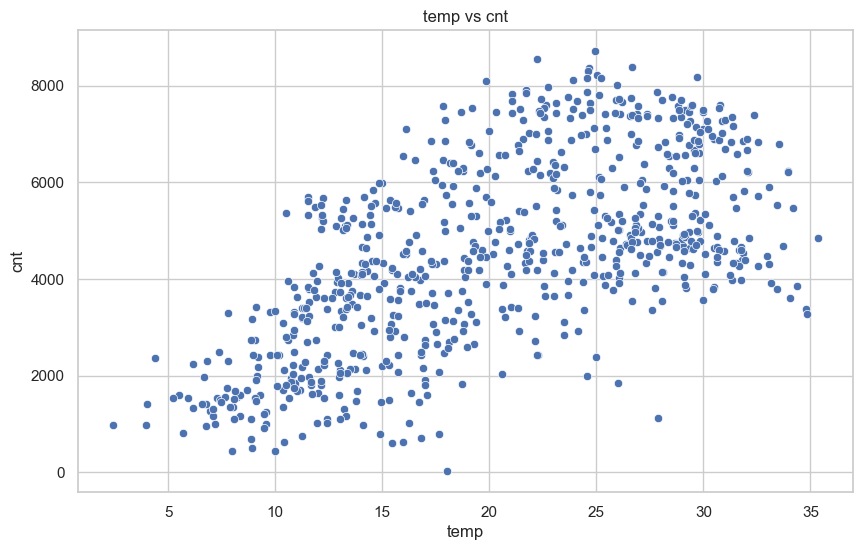

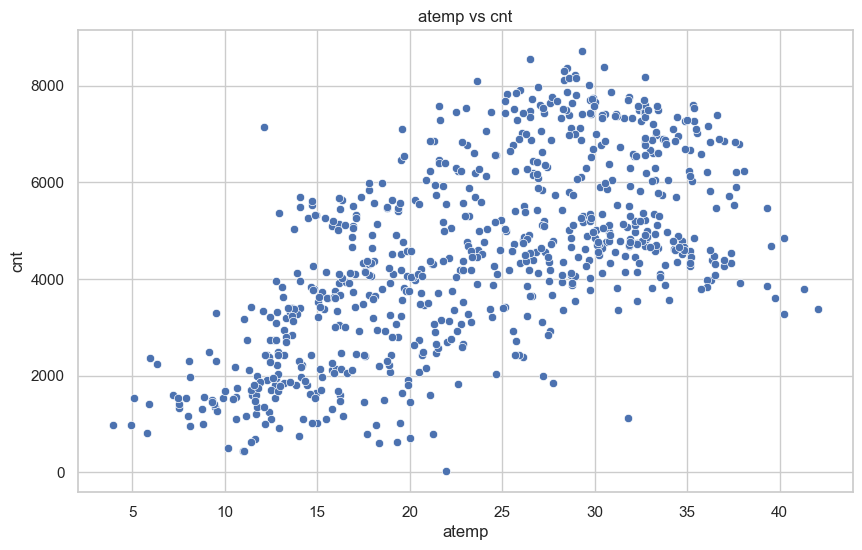

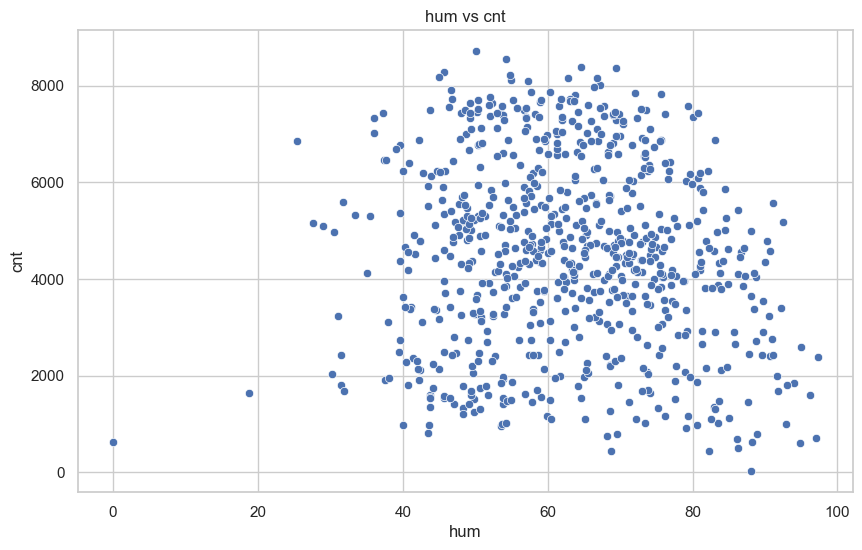

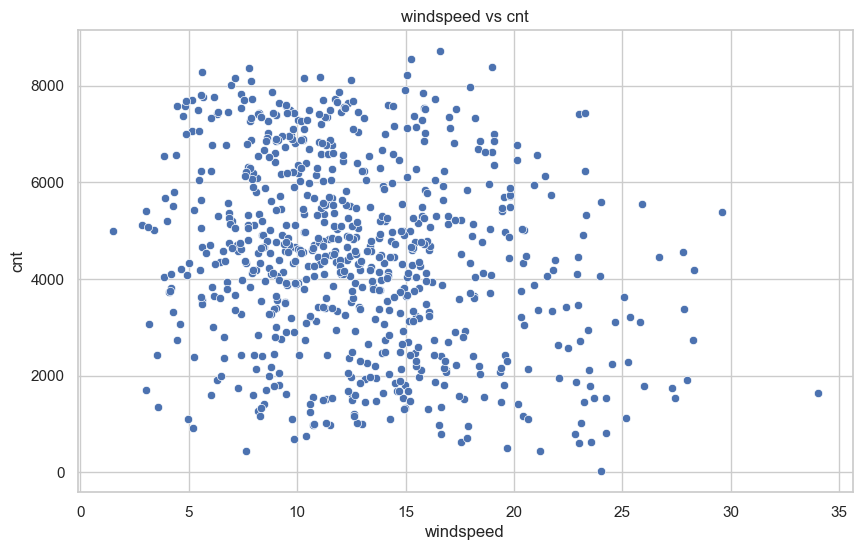

In [118]:
# Plotting scatter plots against 'cnt'
for col in ['temp', 'atemp', 'hum', 'windspeed']:
    plt.figure()
    sns.scatterplot(x=df[col], y=df['cnt'])
    plt.title(f'{col} vs cnt')
    plt.show()


Some of the observations i made based on the above plots :
1. Temperature vs Count (temp vs cnt)
    * There’s clearly a rise in rentals as temperature increases.
    * Most of the higher counts show up in the mid-to-high temperature range.
    * At the extremes (very cold or very hot), the points are more scattered, which makes sense — people avoid riding in those conditions.
2. Feels-like Temperature vs Count (atemp vs cnt)
    * The trend is almost the same as with actual temperature.
    * Higher atemp values generally match with higher rental counts.
    * This one looks a bit more “clean” than temp — maybe people react more to how warm it feels rather than the actual temperature.
3. Humidity vs Count (hum vs cnt)
    * This one doesn’t show much of a pattern.
    * Rentals seem to be all over the place across different humidity levels.
4. Windspeed vs Count (windspeed vs cnt)
    * Similar to humidity, there isn’t a strong pattern here.
    * Higher wind speeds might reduce rentals a bit, but overall it’s pretty scattered.

Overall Summary :
1. Strong positive relationships:
    * Temperature (temp)
    * Feels-like temperature (atemp)
2. Weak or unclear relationships:
    * Humidity
    * Windspeed

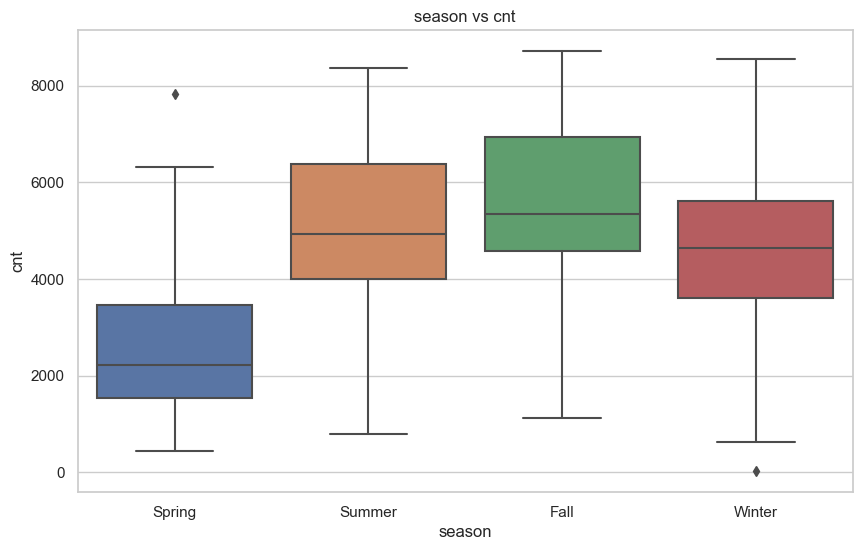

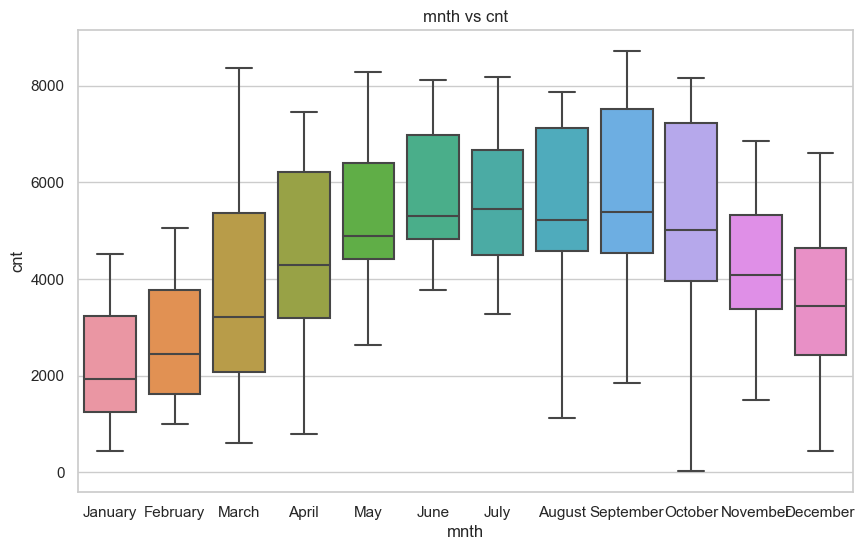

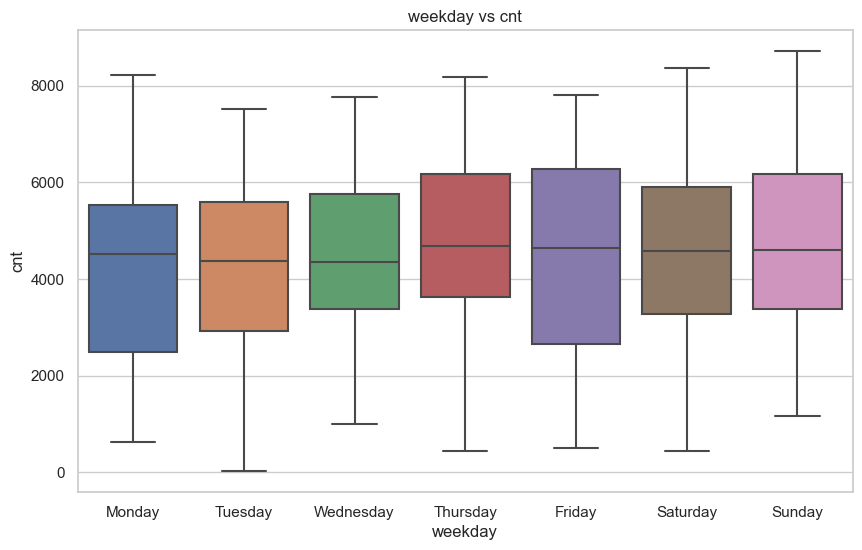

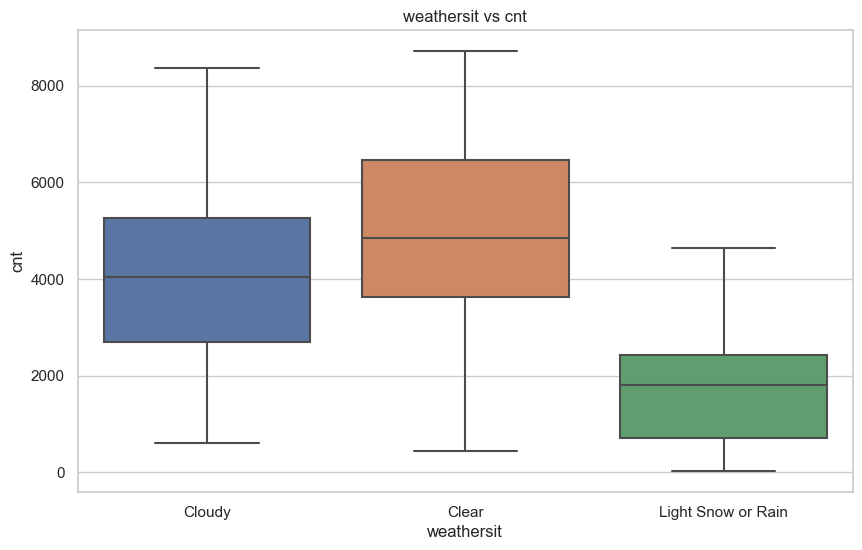

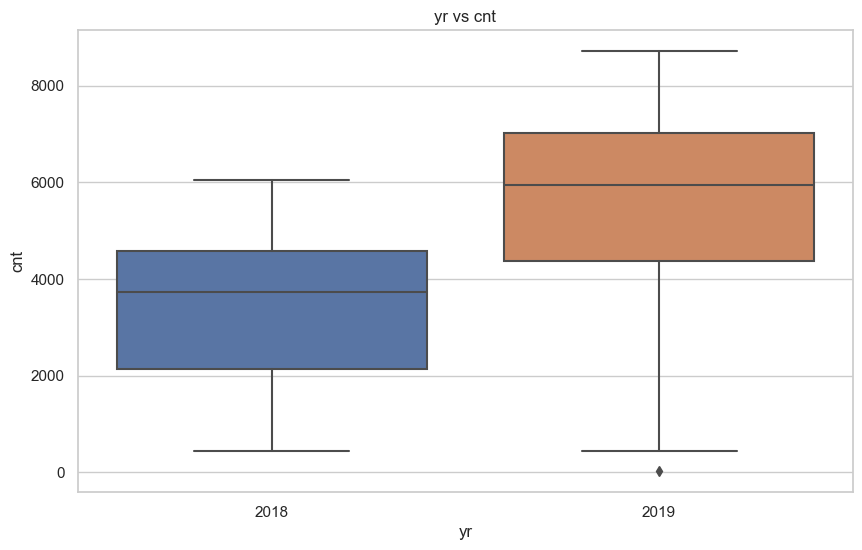

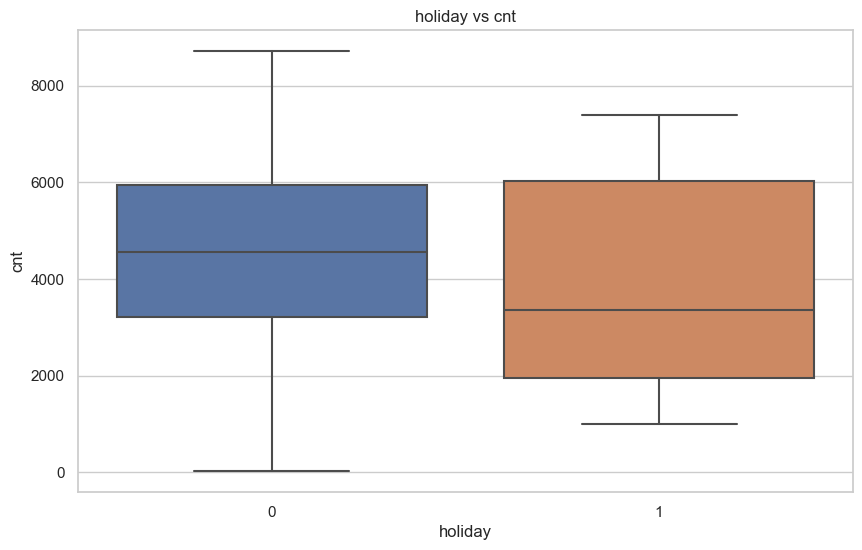

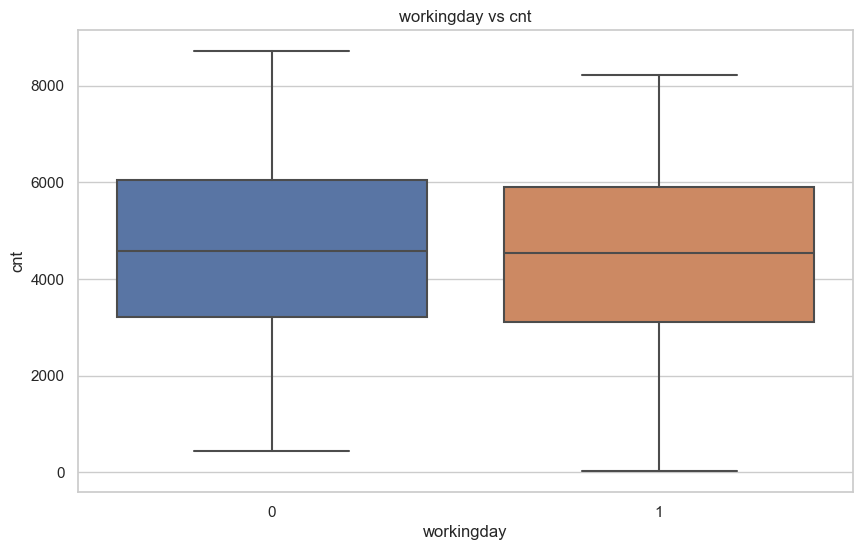

In [119]:
# Plotting scatter plots against 'cnt'
for col in ['season', 'mnth', 'weekday', 'weathersit', 'yr', 'holiday', 'workingday']:
    plt.figure()
    sns.boxplot(x=df[col], y=df['cnt'])
    plt.title(f'{col} vs cnt')
    plt.show()


Some of the observations i made based on the above plots :
1. Season vs Count
    * Spring has noticeably lower rentals compared to the other seasons.
    * Summer and Fall are the busiest, and Fall seems to edge out a bit.
    * Winter is somewhere in the middle — not as high as Summer/Fall but better than Spring.
    * Overall, looks like people ride more when the weather is nicer, which makes sense.
2. Month vs Count
    * Rentals slowly increase from Jan and hit a peak around August/September.
    * The winter months (Jan, Feb, Dec) clearly show the lowest numbers.
    * Warmer months (roughly June to September) are the most active.
3. Weekday vs Count
    * There isn’t a huge difference between weekdays and weekends.
    * The distribution is pretty similar across all days.
    * This probably means people use the service for both weekday travel and weekend outings.
4. Weather Situation vs Count
    * Clear weather has the highest rentals.
    * Cloudy days are a bit lower but still okay.
    * Light snow/rain days see very low usage.
    * Not surprising — people avoid riding in bad weather.
5. Year vs Count
    * 2019 clearly has more rentals than 2018 across the board.
    * Looks like the service became more popular over time.
6. Holiday vs Count
    * Non-holiday days have higher rentals.
    * Holidays show a dip, probably because fewer people commute on those days.
7. Working Day vs Count
    * Working days and non-working days look fairly close.
    * Working days seem to have a slightly tighter spread and a slightly higher median.
    * Again, commuting is likely the reason for the bump.

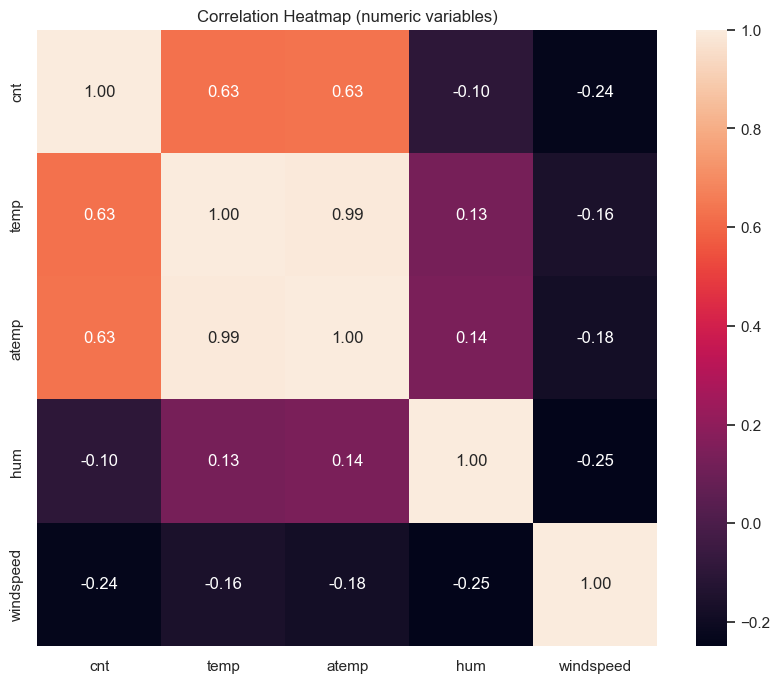

In [120]:
# Co-relation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[['cnt', 'temp', 'atemp', 'hum', 'windspeed']].corr(), annot=True, fmt='.2f')
plt.title('Correlation Heatmap (numeric variables)')
plt.show()


Some of the observations i noticed based on the above corealtion heatmap :
1. Temperature stands out as the strongest driver of rentals.
    * Both temp and atemp show a clear positive correlation with cnt (around 0.63). 
    * This matches the earlier plots where warmer days consistently had higher rental activity.
2. temp and atemp are almost identical.
    * Their correlation is extremely high (0.99), which suggests they carry essentially the same information. Using both in a regression model may create multicollinearity issues.
3. Humidity doesn’t seem to explain much.
    * The correlation between hum and cnt is very low (around –0.10), indicating only a weak relationship, if any.
3. Windspeed has a mild negative association with rentals.
    * With a correlation around –0.24, it appears that higher wind speeds slightly reduce daily ridership.
4. Overall correlation patterns are modest apart from temperature.
    * Aside from the temperature-related variables, most other numeric predictors have fairly weak links with cnt, meaning their impact on rental demand might be limited.

## Step 6 : Data Preparation For Modelling

In this section, i will:

- Drop columns that are not useful or leak information:
  - 'instant' (only an index)
  - 'dteday' (date, already represented by 'yr', 'mnth', 'season')
  - 'casual' and 'registered' (they are components of 'cnt', so using them would leak the target).
- Create dummy variables for categorical fields:
  - 'season', 'mnth', 'weekday', 'weathersit'
- Avoid the dummy variable trap by dropping the first category for each.


In [121]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,Spring,2018,January,0,Monday,1,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,Spring,2018,January,0,Tuesday,1,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,Spring,2018,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,Spring,2018,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,Spring,2018,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [122]:
# Starting from a copy
df_model = df.copy()

In [123]:
df_model.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,Spring,2018,January,0,Monday,1,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,Spring,2018,January,0,Tuesday,1,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,Spring,2018,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,Spring,2018,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,Spring,2018,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [124]:
# drop obvious un-necessary columns
df_model = df_model.drop(['instant', 'casual', 'registered', 'dteday'], axis = 1)

The above columns were dropeed as they were not necessary for further analysis.
* Instant : index column
* casual, registered : components of 'cnt', using would lead to leakage
* dteday : date column, but already represented by 'yr', 'mnth', 'season'

In [125]:
df_model.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,2018,January,0,Monday,1,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,January,0,Tuesday,1,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [126]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 68.6+ KB


In [127]:
# Converting yr to int
df_model['yr'] = df_model['yr'].astype(int)

In [128]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [129]:
# Creating dummy variables for categorical columns using pd.get_dummies
cat_vars = ['season', 'mnth', 'weekday', 'weathersit']

df_dum = pd.get_dummies(df_model, columns=cat_vars, drop_first=True)


In [130]:
df_dum.shape

(730, 30)

In [131]:
df_dum.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy,weathersit_Light Snow or Rain
0,2018,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,1,0
1,2018,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,1,0
2,2018,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,2018,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,2018,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
df_dum.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_August',
       'mnth_December', 'mnth_February', 'mnth_January', 'mnth_July',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'mnth_September', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weathersit_Cloudy',
       'weathersit_Light Snow or Rain'],
      dtype='object')

## Step 7 : Train-Test Split

To evaluate how well the model generalises, I will:

- Separate the data into features `X` and target `y` (`cnt`).
- Split into training and test sets:
  - 70% training data
  - 30% test data
- Use a fixed `random_state` for reproducibility.

In [133]:
# Defining 'X' and 'y'
X = df_dum.drop('cnt', axis=1)
y = df_dum['cnt']

In [134]:
# Splitting into train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [135]:
X_train.shape, X_test.shape

((511, 29), (219, 29))

## Step 8 : Handling Multicollinearity & Choosing Final Features

Approach:

1. Fit an initial OLS model with all variables.
2. Check:
   - p-values (keeping variables with p < 0.05)
   - VIF values (to detect multi-collinearity)
3. Drop:
   - One of temp / atemp due to high correlation.
   - workingday and weekday_* dummies as they are highly related.
   - mnth_* dummies (months and seasons capture similar information).

Final set of predictors used in the model:

- yr
- holiday
- atemp
- hum
- windspeed
- season_Spring
- season_Summer 
- season_Winter
- weathersit_Cloudy
- weathersit_Light Snow or Rain

In other words, I'll use :

    - statsmodels OLS to get p-values.
    - VIF to check multicollinearity.
    - Drop variables step-by-step.

Columns kept : 

    - yr, holiday, atemp, hum, windspeed, 
    - cnt, 
    - season_Spring, season_Summer, season_Winter, weathersit_Cloudy, weathersit_Light Snow or Rain

Columns dropped :

    - temp (strongly correlated with atemp)
    - workingday, all weekday_ dummies
    - all mnth_ dummies (they overlap with season)

In [136]:
# creating copy
X_train_reduced = X_train.copy()
X_test_reduced = X_test.copy()

In [137]:
# columns to drop: temp, workingday, weekday dummies, month dummies
cols_to_drop = []

if 'temp' in X_train_reduced.columns:
    cols_to_drop.append('temp')

if 'workingday' in X_train_reduced.columns:
    cols_to_drop.append('workingday')

cols_to_drop += [c for c in X_train_reduced.columns if c.startswith('weekday_')]

cols_to_drop += [c for c in X_train_reduced.columns if c.startswith('mnth_')]

In [138]:
print(cols_to_drop)

['temp', 'workingday', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday', 'mnth_August', 'mnth_December', 'mnth_February', 'mnth_January', 'mnth_July', 'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October', 'mnth_September']


In [139]:
X_train_reduced = X_train_reduced.drop(columns=cols_to_drop)
X_test_reduced = X_test_reduced.drop(columns=cols_to_drop)

In [140]:
X_train_reduced.columns

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'weathersit_Cloudy',
       'weathersit_Light Snow or Rain'],
      dtype='object')

In [141]:
# Fitting the model
X_train_sm = sm.add_constant(X_train_reduced)
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     225.3
Date:                Sun, 30 Nov 2025   Prob (F-statistic):          4.54e-178
Time:                        05:14:25   Log-Likelihood:                -4156.8
No. Observations:                 511   AIC:                             8336.
Df Residuals:                     500   BIC:                             8382.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -3.977e+06   1.51e+05    -26.292      0.000   -4.27e+06   -3.68e+06
yr                             1971.6468     74.922     26.316      0.000    1824.446    2118.847
holiday                        -662.0014    227.478     -2.910      0.004   -1108.932    -215.070
atemp                           112.9535      8.423     13.410      0.000      96.405     129.502
hum                             -12.4974      3.580     -3.491      0.001     -19.530      -5.464
windspeed                       -35.2591      8.194     -4.303      0.000     -51.358     -19.160
season_Spring                  -981.6331    183.932     -5.337      0.000   -1343.007    -620.259
season_Summer                   254.2930    115.812      2.196      0.029      26.754     481.832
season_Winter                   662.3470    142.609      4.644      0.000     382.160     942.534
weathersit_Cloudy              -444.5016     96.845     -4.590      0.000    -634.774    -254.229
weathersit_Light Snow or Rain -1782.5843    247.027     -7.216      0.000   -2267.923   -1297.245
==============================================================================
Omnibus:                       72.162   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.611
Skew:                          -0.784   Prob(JB):                     1.97e-33
Kurtosis:                       5.148   Cond. No.                     8.28e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Regularization techniques (***Ridge***/***Lasso***) could further stabilize coefficients and handle multicollinearity, but OLS is used here to maintain interpretability required for academic evaluation.

After fitting the reduced OLS model, a few things stood out quite clearly to me :
    
1. Model Fit : The model explains about 81–82% of the variation in bike rentals (R² ≈ 0.818, Adjusted R² ≈ 0.815). For a simple linear model, this is quite decent and suggests that the selected predictors are doing a good job.
2. Significant Predictors
    * Most of the variables in this reduced model turned out to be statistically significant (p-value < 0.05). The ones with strong and clear effects include:
        * yr – Positive and large impact. Rentals are higher in 2019 compared to 2018.
        * atemp – Strong positive relationship. Warmer (or rather, “feels-like” warmer) days bring more rentals.
        * windspeed – Negative effect. Higher wind speeds reduce the number of rides.
        * holiday – Rentals drop on holidays.
        * Season effects: Winter and Summer add to rental counts, Spring pulls the count down noticeably.
        * Weather situation: Cloudy days reduce rentals a bit, whereas light snow or rain has a big negative effect.
3. Coefficient Direction Makes Sense :   
   The signs of the coefficients line up with intuition:
    * Bad weather → fewer rides
    * Warmer temps → more rides
    * Higher winds → fewer rides
    * Later year → more adoption → more rides
4. Multicollinearity Note
    * The condition number (~8.2e+06) is high. This usually means some predictors are still correlated but not a major issue since we dropped the columns in the beginning.

        

In [142]:
# VIF Check
vif_df = pd.DataFrame()
vif_df['feature'] = X_train_reduced.columns
vif_df['VIF'] = [variance_inflation_factor(X_train_reduced.values, i)
                 for i in range(X_train_reduced.shape[1])]
vif_df.sort_values('VIF', ascending=False)


,feature,VIF
0,yr,99.161627
3,hum,38.967867
2,atemp,33.279296
4,windspeed,9.027798
5,season_Spring,5.729124
7,season_Winter,3.730268
6,season_Summer,2.543793
8,weathersit_Cloudy,2.359847
9,weathersit_Light Snow or Rain,1.315100
1,holiday,1.040484


Looking at the VIF values, a couple of things stood out to me:
1. yr has an extremely high VIF (close to 100).
    * That basically means it’s strongy tied to other variables in the model. It makes sense because rentals increase year over year, so it naturally overlaps with seasonal/monthly patterns.
2. hum and atemp also have pretty high values (around 39 and 33).
    * These two usually move with temperature and general weather conditions, so some multicollinearity here isn’t surprising.
3. windspeed and the season-related dummies sit in a more reasonable range (roughly 3–9).
    * Nothing alarming there — still acceptable for regression.
4. The weather-type dummies and holiday have very low VIFs.
    * They don’t seem to overlap much with the other predictor, so they’re bringing unique information.

Overall : There is some multicollinearity in the model — especially from yr, hum, and atemp, but the other predictors look okay. At this stage the values are interpretable and not unexpected for this dataset.

### Note on Alternative Approaches for Multicollinearity
Apart from dropping a few strongly correlated variables, another standard approach to
handling multicollinearity in linear regression is the use of regularisation techniques 
such as **Ridge** and **Lasso** regression. These models shrink coefficients and reduce
variance, leading to more stable estimates. 

However, since the main learning goal of this assignment is to perform classical
multiple linear regression and interpret the coefficients, I proceeded with the OLS model
for transparency and interpretability. Regularised models would be more suitable in a
production scenario, but OLS provides clearer statistical insight for academic evaluation.


## Step 9 : Model Evaluation on Training Data

### Model Selection Consideration
Typically, model selection is assisted by techniques such as **cross-validation**, which 
helps evaluate how well a model generalises to unseen data. Methods like k-fold CV or 
information criteria (AIC/BIC) can be used in linear regression to compare multiple 
candidate models.

Due to the scope of this assignment and the focus on interpretability, I continued with 
the reduced OLS model after addressing multicollinearity. The evaluation below verifies 
that the chosen predictors generalise reasonably well on the unseen test dataset.


I will now:

- Calculate R-squared and adjusted R-squared on the training data.
- Use the model to generate predictions on the training set.
- Compute residuals for residual analysis in the next section.

The expectation is that the model should explain a large proportion of variance in `cnt` while still remaining simple and interpretable.

In [143]:
# R-squared and adjusted R-squared
print("R-squared (train):", lm.rsquared)
print("Adj. R-squared (train):", lm.rsquared_adj)

# predictions on training data
y_train_pred = lm.predict(X_train_sm)

# residuals
residuals = y_train - y_train_pred

R-squared (train): 0.8184071547208587
Adj. R-squared (train): 0.8147752978152758


## Step 10 : Residual Analysis and Assumption Checks

For a good linear regression model, the following should roughly hold:

1. Linearity : Relationship between predictors and `cnt` is approximately linear.
2. Normality of residuals: Residuals should be roughly normally distributed.
3. Homoscedasticity: Residuals should have constant variance across fitted values.
4. No strong multicollinearity: Checked earlier using VIF.

Here I plot:

- Histogram of residuals.
- Q-Q plot of residuals.
- Residuals vs predicted values.

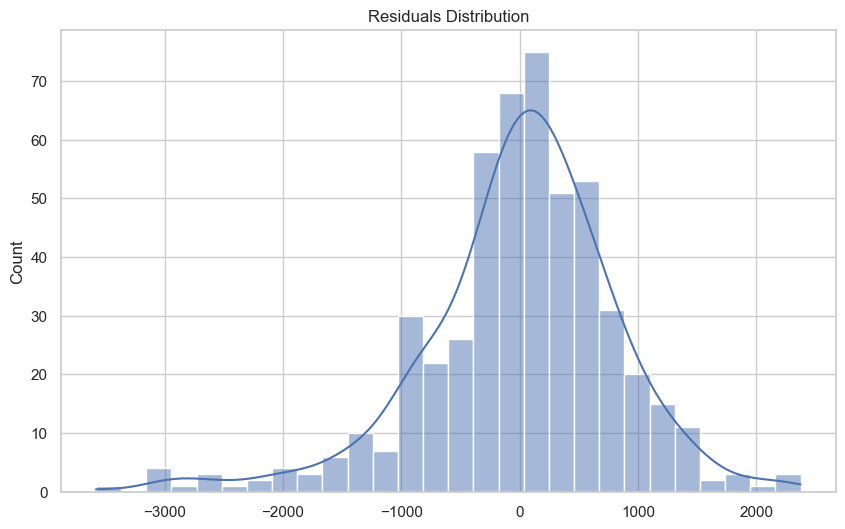

In [144]:
# histogram for residuals
plt.figure()
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()


The residuals seem to sit mostly around zero, which is what I expected. The overall shape is somewhat normal, though not perfectly — there’s a slight tilt on the left, and the ends look a bit heavier. So the model is doing fine overall, just not perfectly symmetrical.

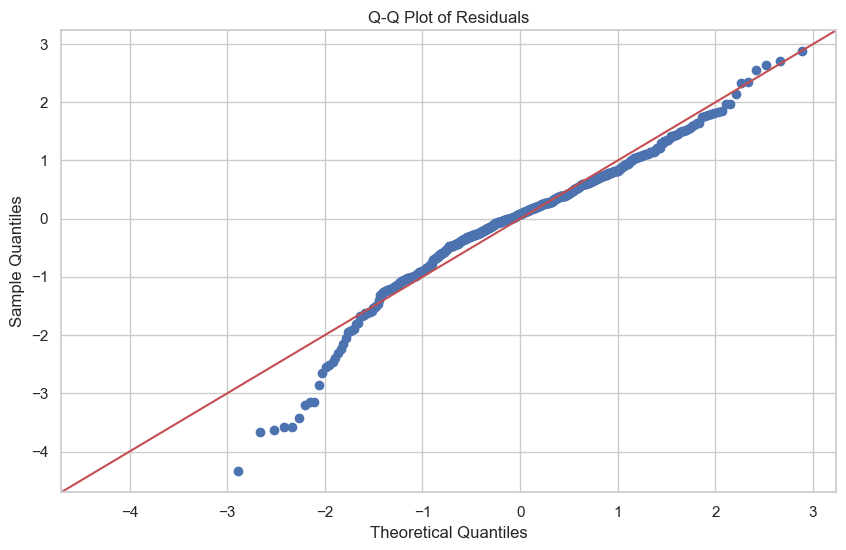

In [145]:
# Q-Q plot
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()


Most of the points line up nicely with the reference line in the middle, which suggests the residuals are generally normal. The bigger deviations are at the extremes, especially on the lower tail, so the very large errors aren’t following normality that well. This is common, but worth noting.

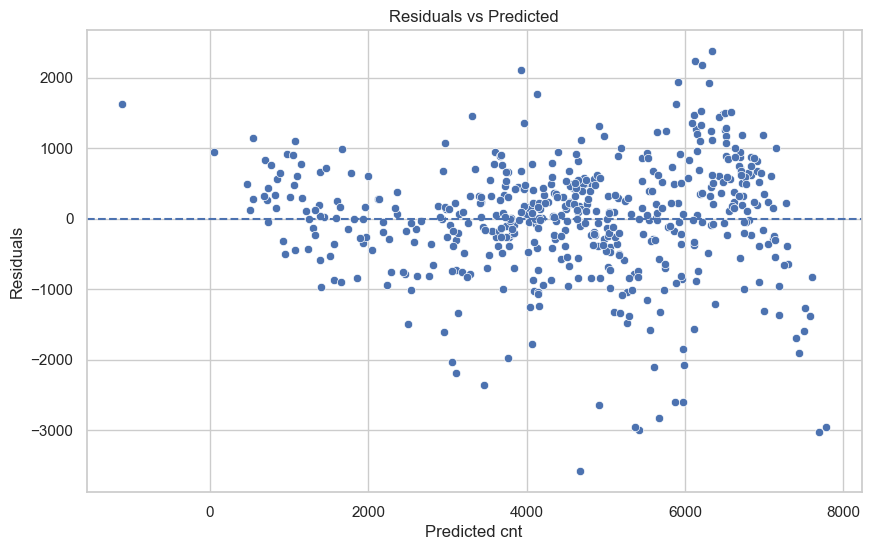

In [146]:
# residuals vs predicted
plt.figure()
sns.scatterplot(x=y_train_pred, y=residuals)
plt.axhline(0, linestyle='--')
plt.xlabel('Predicted cnt')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()


The points are mostly scattered randomly around zero, so there's no obvious pattern of the model consistently over- or under-predicting. I did notice that the spread becomes a bit wider at higher predicted value. It’s not drastic, but the error variance does seem to increase slightly as predictions get larger.

## Step 11 : Model Evaluation on Test Data

Finally, I am checking how well the model generalises to unseen data:

- Use the final model to predict 'cnt'on the test set.
- Compute:
  - R-squared on test data.
  - RMSE (Root Mean Squared Error).

In [147]:
# add constant to test set
X_test_sm = sm.add_constant(X_test_reduced)

y_test_pred = lm.predict(X_test_sm)

In [148]:
# metrics
r2_test = r2_score(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

print("Test R-squared:", r2_test)
print("Test RMSE:", rmse_test)

Test R-squared: 0.8181892912418695
Test RMSE: 821.3523196890998


* Train R-squared: ~0.818
* Test R-squared: ~0.818

The R-squared values on train and test are almost identical which means the model is capturing the pattern in the data without clearly overfitting.

* Test RMSE: ~821 rentals

On average, the model’s predictions are off by around 800–820 bikes per day. Given that daily counts go up to ~8000+, this error is noticeable but still reasonable. 

### Final Remarks
While more advanced linear modelling approaches (e.g., Ridge, Lasso, Elastic Net) could 
potentially improve stability and predictive performance, the OLS model used here provides 
clear interpretability of the coefficients, which is essential for business understanding. 
The model meets the objective of explaining how key variables such as temperature, weather 
conditions, year, and seasonal effects influence bike rental demand.


## Step 12 : Conclusion

### Business Conclusions

Based on the final regression model, a few patterns about bike demand became clear to me.  
First, the year variable has a strong positive effect, which basically means demand was higher in 2019 than in 2018. This suggests that the service was growing anyway, regardless of the weather or seasonal factors.

Weather-related variables turned out to be very important. The “feels-like” temperature had a strong positive impact on daily rentals, while humidity and windspeed worked in the opposite direction. From a business point of view, this means that comfortable weather conditions naturally encourage more people to use the service.

Seasonality also plays a noticeable role. In general, demand was higher during summer and fall, and lower during spring. Bad weather conditions (especially mist, snow or light rain) consistently reduced ridership compared to clear days.

Holidays and non-working days tended to have lower demand, which makes sense because a large share of users appear to be commuters.

### What this means for BoomBikes

- The company should plan for higher activity on warm, pleasant-weather days and during summer/fall. These are the periods where having more bikes available and ensuring good service levels will matter most.
- Since demand is on an upward trend year-over-year, expanding the fleet or improving station coverage could be justified.
- Periods with consistently low demand (holidays, rainy days, high humidity) can be used for maintenance or relocation of bikes.
- Promotional campaigns may work better if they are aligned with favourable weather or the start of high-demand seasons.

Overall, the model explains around 81–82% of the variation in daily demand. The train and test R² values are almost the same, which suggests that the model generalises well. The RMSE is roughly 800 bikes, which isn’t perfect but still reasonable considering that daily demand can exceed 8000 rentals. The model can therefore be used as a reliable guide for capacity planning and demand forecasting.
